In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:06<00:00, 187MB/s]
100% 1.06G/1.06G [00:06<00:00, 175MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [11]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization


In [4]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [5]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [12]:
# create CNN model
model = Sequential()

model.add(Conv2D(32, (3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, (3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, (3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [14]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)


In [15]:
history = model.fit(train_ds, epochs=10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 70s 105ms/step - loss: 1.0458 - accuracy: 0.5940 - val_loss: 0.7283 - val_accuracy: 0.5888
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5757 - accuracy: 0.6976 - val_loss: 0.5445 - val_accuracy: 0.7116
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4841 - accuracy: 0.7580 - val_loss: 0.4682 - val_accuracy: 0.7736
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4330 - accuracy: 0.7846 - val_loss: 0.4373 - val_accuracy: 0.8042
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3879 - accuracy: 0.8110 - val_loss: 0.6511 - val_accuracy: 0.7236
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3300 - accuracy: 0.8371 - val_loss: 0.5416 - val_accuracy: 0.7894
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2813 - accuracy: 0.8658 - val_loss: 0.6522 - val_ac

In [17]:
loss, accuracy = model.evaluate(validation_ds)
print(f'Test Accuracy: , {accuracy}, Loss: {loss}' )

157/157 [==============================] - 8s 50ms/step - loss: 0.7827 - accuracy: 0.8184
Test Accuracy: , 0.8184000253677368, Loss: 0.782663106918335


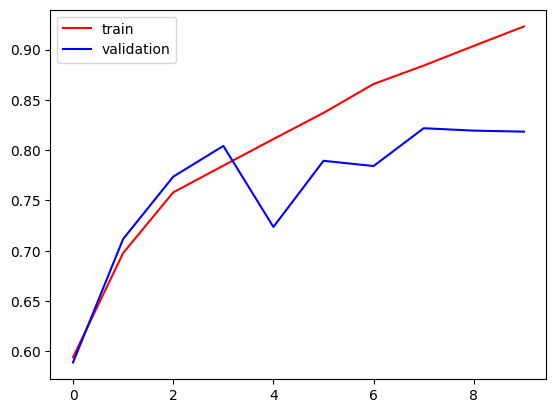

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [27]:
import cv2
img = cv2.imread('/content/all-about-tabby-cats-552489-hero-a23a9118af8c477b914a0a1570d4f787.jpg')

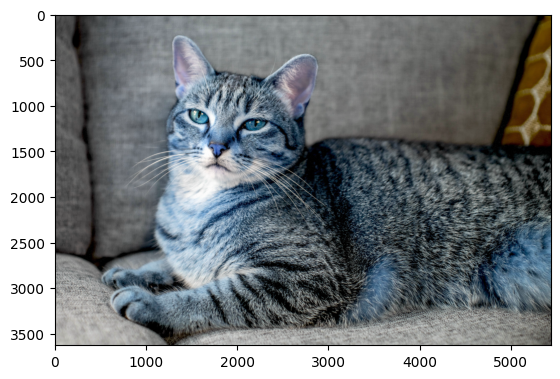

In [28]:
plt.imshow(img)

In [29]:
img.shape

(3627, 5441, 3)

In [30]:
img = cv2.resize(img,(256, 256))

In [31]:
test_input = img.reshape((1, 256, 256, 3))

In [32]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[6.0469466e-07]], dtype=float32)